Unit 2 - Lesson 4- Project 4

## Challenge: make your own regression model
 
Now that you've spent some time playing with a sample multivariate linear regression model, it's time to make your own.

You've already gotten started by prepping the FBI:UCR Crime dataset (Thinkful mirror) in a previous assignment.

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

## Import the dataset and clean

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_excel ('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
df_nypd = df.drop([0,1,2, 3])
df_nypd.columns = df.iloc[3]
df_nypd= df_nypd.reset_index(drop=True)

In [4]:
df_nypd.columns = df_nypd.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')','').str.replace('\n', '_')

In [5]:
df_nypd.loc[df_nypd['murder_and_nonnegligent_manslaughter'].isna(), 'murder_and_nonnegligent_manslaughter'] =0
df_nypd.loc[df_nypd['robbery'].isna(), 'robbery'] =0
df_nypd['population'] = df_nypd.population.fillna(df_nypd.population.mean())

In [6]:
df_nypd

3,city,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised_definition1,rape_legacy_definition2,robbery,aggravated_assault,property_crime,burglary,larceny-_theft,motor_vehicle_theft,arson3
0,Adams Village,1861.000,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577.000,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846.000,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956.000,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388.000,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089.000,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781.000,3,0,NaN,0,0,3,10,0,10,0,0
7,Amherst Town,118296.000,107,1,NaN,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519.000,9,0,NaN,2,4,3,210,16,188,6,1
9,Amsterdam,18182.000,30,0,NaN,0,12,18,405,99,291,15,0


In [25]:
df_nypd.groupby(['city'])['population'].describe().sort_values(by='max', ascending=False ).head(10)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Buffalo,1.000,258789.000,nan,258789.000,258789.000,258789.000,258789.000,258789.000
Rochester,1.000,210562.000,nan,210562.000,210562.000,210562.000,210562.000,210562.000
Yonkers,1.000,199134.000,nan,199134.000,199134.000,199134.000,199134.000,199134.000
Syracuse,1.000,143834.000,nan,143834.000,143834.000,143834.000,143834.000,143834.000
Amherst Town,1.000,118296.000,nan,118296.000,118296.000,118296.000,118296.000,118296.000
Albany,1.000,97956.000,nan,97956.000,97956.000,97956.000,97956.000,97956.000
Greece Town,1.000,96667.000,nan,96667.000,96667.000,96667.000,96667.000,96667.000
Ramapo Town,1.000,87204.000,nan,87204.000,87204.000,87204.000,87204.000,87204.000
Clarkstown Town,1.000,80705.000,nan,80705.000,80705.000,80705.000,80705.000,80705.000


In [9]:
#found that there were 3 additional non-city variables in the data and removed them
df_nypd.groupby('city').describe()

3                                                  population                 \
                                                        count       mean std   
city                                                                           
1 The figures shown in this column for the offe...      1.000  40037.632 nan   
2 The figures shown in this column for the offe...      1.000  40037.632 nan   
3 The FBI does not publish arson data unless it...      1.000  40037.632 nan   
Adams Village                                           1.000   1861.000 nan   
Addison Town and Village                                1.000   2577.000 nan   
Akron Village                                           1.000   2846.000 nan   
Albany                                                  1.000  97956.000 nan   
Albion Village                                          1.000   6388.000 nan   
Alfred Village                                          1.000   4089.000 nan   
Allegany Village                                        1.000   1781.000 nan   
Amherst Town                                            1.000 118296.000 nan   
Amityville Village                                      1.000   9519.000 nan   
Amsterdam                                               1.000  18182.000 nan   
Arcade Village                                          1.000   2053.000 nan   
Ardsley Village                                         1.000   4523.000 nan   
Asharoken Village                                       1.000    658.000 nan   
Attica Village                                          1.000   2522.000 nan   
Auburn                                                  1.000  27270.000 nan   
Avon Village                                            1.000   3333.000 nan   
Baldwinsville Village                                   1.000   7473.000 nan   
Ballston Spa Village                                    1.000   5418.000 nan   
Batavia                                                 1.000  15374.000 nan   
Bath Village                                            1.000   5733.000 nan   
Bedford Town                                            1.000  17627.000 nan   
Bethlehem Town                                          1.000  34243.000 nan   
Binghamton                                              1.000  46304.000 nan   
Black River                                             1.000   1410.000 nan   
Blooming Grove Town                                     1.000  12001.000 nan   
Bolivar Village                                         1.000   1022.000 nan   
Bolton Town                                             1.000   2325.000 nan   
...                                                       ...        ...  ..   
Tupper Lake Village                                     1.000   3642.000 nan   
Tuxedo Park Village                                     1.000    615.000 nan   
Ulster Town                                             1.000  12195.000 nan   
Utica                                                   1.000  61686.000 nan   
Vestal Town                                             1.000  27980.000 nan   
Walden Village                                          1.000   6887.000 nan   
Wallkill Town                                           1.000  27940.000 nan   
Walton Village                                          1.000   3012.000 nan   
Warsaw Village                                          1.000   3453.000 nan   
Washingtonville Village                                 1.000   5828.000 nan   
Waterford Town and Village                              1.000   8392.000 nan   
Waterloo Village                                        1.000   5175.000 nan   
Watertown                                               1.000  28179.000 nan   
Watervliet                                              1.000  10245.000 nan   
Watkins Glen Village                                    1.000   1862.000 nan   
Waverly Village                                         1.000   4337.000 nan   


In [10]:
df_nypd = df_nypd[:-3] 

In [24]:
#removed New York from data set as an outlier (even though it is where I live and I would like to be inclusive, it deserves its own model)
df_nypd= df_nypd.loc[df_nypd['city'] != 'New York']

In [26]:
df_nypd.groupby(['city'])['population'].describe().sort_values(by='max', ascending=False ).head(10)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Buffalo,1.000,258789.000,nan,258789.000,258789.000,258789.000,258789.000,258789.000
Rochester,1.000,210562.000,nan,210562.000,210562.000,210562.000,210562.000,210562.000
Yonkers,1.000,199134.000,nan,199134.000,199134.000,199134.000,199134.000,199134.000
Syracuse,1.000,143834.000,nan,143834.000,143834.000,143834.000,143834.000,143834.000
Amherst Town,1.000,118296.000,nan,118296.000,118296.000,118296.000,118296.000,118296.000
Albany,1.000,97956.000,nan,97956.000,97956.000,97956.000,97956.000,97956.000
Greece Town,1.000,96667.000,nan,96667.000,96667.000,96667.000,96667.000,96667.000
Ramapo Town,1.000,87204.000,nan,87204.000,87204.000,87204.000,87204.000,87204.000
Clarkstown Town,1.000,80705.000,nan,80705.000,80705.000,80705.000,80705.000,80705.000


## Select the features for Modeling

In [13]:
features = pd.DataFrame(df_nypd['population'])

In [14]:
features['population_sqd'] = df_nypd['population'] * df_nypd['population']

In [15]:
features['murder'] = np.where(df_nypd['murder_and_nonnegligent_manslaughter']>0, 1, 0)
features['robbery']= np.where(df_nypd['robbery']>0, 1,0)

In [27]:
features

,population,population_sqd,murder,robbery,log_population
0,1861.000,3463321.000,0,0,7.529
1,2577.000,6640929.000,0,0,7.854
2,2846.000,8099716.000,0,0,7.954
3,97956.000,9595377936.000,1,1,11.492
4,6388.000,40806544.000,0,1,8.762
5,4089.000,16719921.000,0,1,8.316
6,1781.000,3171961.000,0,0,7.485
7,118296.000,13993943616.000,1,1,11.681
8,9519.000,90611361.000,0,1,9.161
9,18182.000,330585124.000,0,1,9.808


## Visualize the features

                population  population_sqd  murder  robbery
population           1.000           0.889   0.503    0.344
population_sqd       0.889           1.000   0.345    0.152
murder               0.503           0.345   1.000    0.311
robbery              0.344           0.152   0.311    1.000


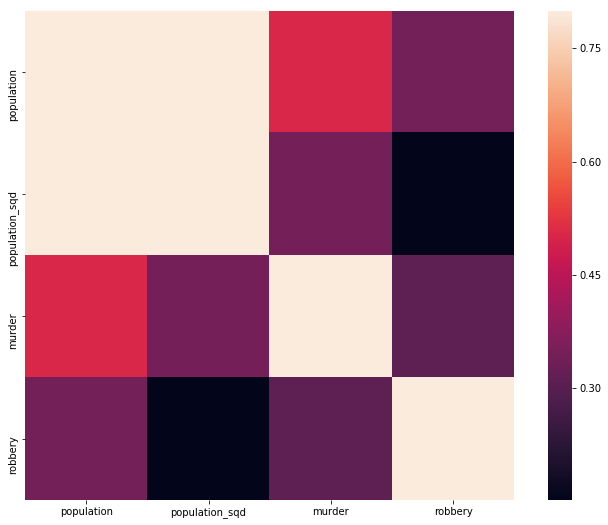

In [17]:
corrmat = features.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

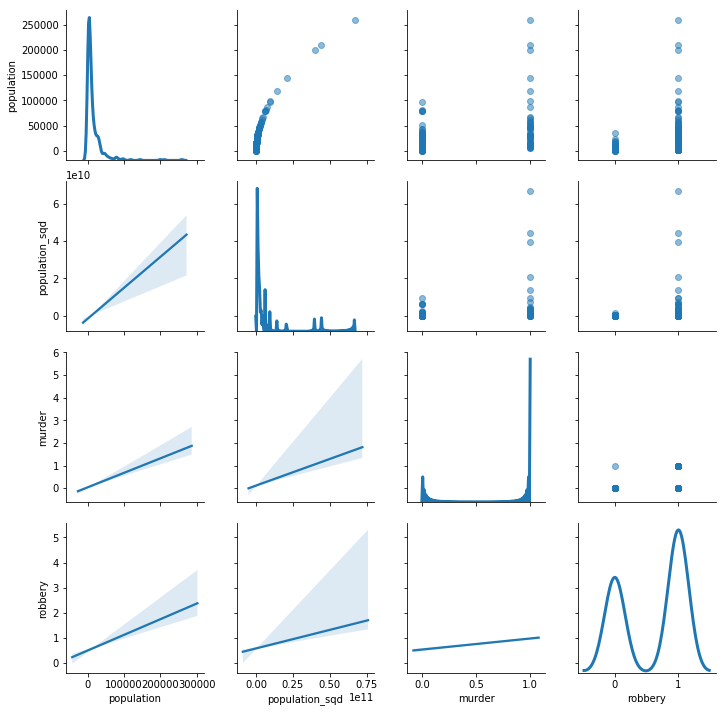

In [18]:
crime = sns.PairGrid(features, diag_sharey=False)

crime.map_upper(plt.scatter, alpha=.5)

crime.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

crime.map_diag(sns.kdeplot, lw=3)
plt.show();

## Regression Model

In [19]:
features.corr()

,population,population_sqd,murder,robbery
population,1.000,0.889,0.503,0.344
population_sqd,0.889,1.000,0.345,0.152
murder,0.503,0.345,1.000,0.311
robbery,0.344,0.152,0.311,1.000


In [20]:
# Instantiate and fit our model.
regr = LinearRegression()
Y = features['population'].values
X = features.drop('population', axis=1).values
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [4.29207716e-06 1.35909277e+04 9.27982430e+03]

Intercept: 
 4282.822449174002

R-squared:
0.858783666984038


In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 4 columns):
population        347 non-null float64
population_sqd    347 non-null float64
murder            347 non-null int64
robbery           347 non-null int64
dtypes: float64(2), int64(2)
memory usage: 23.6 KB


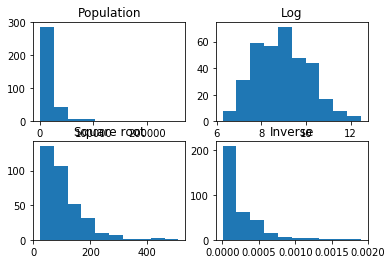

In [22]:
g = plt.figure()

g.add_subplot(221)
plt.hist(df_nypd['population'].dropna())
plt.title('Population')

g.add_subplot(222)
plt.hist(np.log(df_nypd['population'].dropna()))
plt.title('Log')

g.add_subplot(223)
plt.hist(np.sqrt(df_nypd['population'].dropna()))
plt.title('Square root')

ax3=g.add_subplot(224)
plt.hist(1/df_nypd['population'].dropna())
plt.title('Inverse')
plt.show()

#log gives us something here so I made a feature
features['log_population'] = np.log(df_nypd['population'])

In [ ]:
#I cleaned up the mo